# Homework 2: Programming

The following notebook contains skeleton-code for answering problems 2-4 of homework assignment 2. Please read through each cell carefully to understand what is expected to be implemented. For your final submission, please try to clean up any intermediate outputs used for debugging.


For sumbission, you need to submit
 - this notebook (.ipynb file) with all cell outputs
 - an exported PDF version with cell outputs of this notebook

You need to check that cell outputs are included in your PDF file \(sometimes the outputs will not be properly shown when exporting\), and then put them in the same ZIP file and submit to Homework 2-programming on Gradescope.



### Imports

You should be able to complete the entire assignment using only the following imports. Please consult the course staff if you are unsure about whether additional packages may be used.

In [ ]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Question 2


Below we provide an AutoGrad class named `Value`. The basic idea is to store the existing computational map during the creation of each `Value`, and calculate the gradient using backpropagation when one of the `Value` calls `backward()` method.

The `backward()` function will arange the computational graph and backpropagate the gradients. All you need to do is to implement all the operations with its corresponding `_backward` function. We have provided the `__add__` function (sum of two nodes) as an example to help get you started.

This notebook is designed in a Object Oriented way, if you are not farmiliar with the Object Oriented Programming in Python, you can refer to:

(1) https://realpython.com/python3-object-oriented-programming/

(2) https://docs.python.org/3/tutorial/classes.html


In [ ]:
class Value:

    """
    Basic unit of storing a single scalar value and its gradient
    """

    def __init__(self, data, _children=()):
        """

        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None

    def __add__(self, other):
        """
        Example implementation of a single class operation (addition)

        Args:
            other (Any): Node to add with the class

        Returns:
            out (callable): Function to referesh the gradient
        """
        #Firstly, convert some default value type in python to Value
        #Then do operations with two or more Value object
        other = other if isinstance(other, Value) else Value(other)

        #Secondly, create a new Value object which is the result of the operation
        out = Value(self.data + other.data, (self, other))

        #Thirdly, create a _backward function for the output object to refresh
        # the gradient of its _childrens,
        #Then assign this _backward function to the output object.
        def _backward():
            # print('back add ',self.data, ' and ', other.data, ', out grad =', out.grad)
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        """
        Multiplication operation (e.g. Value(3) * Value(2) = Value(6))
        """
        #TODO implement multiplication operation

        # Convert default value type to Value
        other = other if isinstance(other, Value) else Value(other)

        # Create output node
        out = Value(self.data * other.data, (self, other))

        # Define backward gradient
        def _backward():
            # print('back mul, out = ', out.grad)
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out

    def __pow__(self, other):
        """
        Power operation (e.g Value(3) ** 2 = Value(9))
        """
        #TODO implement power operation, we don't need to convert the exponent to Value
        assert isinstance(other, (int, float))

        # Create output node
        out = Value(pow(self.data, other), (self, ))

        def _backward():
          self.grad += other*(self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        #TODO implement the relu activation function for the value itself.
        out = Value(max(0.0, self.data), (self, ))

        def _backward():
          if self.data > 0:
            self.grad += out.grad
          else:
            self.grad = 0 # reset gradient
        out._backward = _backward

        return out

    def exp(self):
        """
        Exponentiate the current Value (e.g. e ^ Value(0) = Value(1))
        """
        #TODO implement the exponential function for and treat the value as exponent.
        #The base is natural e, you can use numpy to calculate the value of the exponential.
        out = Value(np.exp(self.data), (self, ))

        def _backward():
          self.grad += out.grad * np.exp(self.data)
        out._backward = _backward

        return out

    def log(self):
        """
        Take the natural logarithm (base e) of the current Value
        """
        #TODO implement the logarithm function for and treat the value as exponent.
        #The bottom number should be e, you can use numpy to calculate the value of the logarithm.
        out = Value(np.log(self.data), (self, ))

        def _backward():
          self.grad += out.grad * self.data**(-1)
        out._backward = _backward

        return out

    def backward(self):
        """
        Run backpropagation from the current Value
        """
        #This function is called when you start backpropagation from this Value

        #The gradient of this value is initialized to 1 for you.
        self.grad = 1

        #You need to find a right topological order all of the children in the graph.
        #As for topology sort, you can refer to http://www.cs.cornell.edu/courses/cs312/2004fa/lectures/lecture15.htm

        topo = []
        #TODO find the right list of Value to be traversed
        '''
        Hint: you can recursively visit all non-visited node from the node calling backward.
        add one node to the head of the list after all of its children node are visited
        '''
        visited = set() # Set to keep track of visited nodes of graph.

        def dfs(node):  #function for depth-first search
          if node not in visited:
              # print (node)
            visited.add(node)
            for child in node._prev:
              dfs(child)
            topo.append(node)

        dfs(self)
        topo.reverse() # dfs outputs in reverse order

        #go one variable at a time and apply the chain rule to get its gradient
        # print('Topological sort Values:')
        for v in topo:
            v._backward()
            # print(v)

    # We handled the negation and reverse operations for you
    def __neg__(self): # -self
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): #other + self
        """
        Reverse addition operation (ordering matters in Python)
        """
        return self + other

    def __sub__(self, other): # self - other
        """
        Subtraction operation
        """
        return self + (-other)

    def __rsub__(self, other): # other - self
        """
        Reverse subtraction operation
        """
        return other + (-self)

    def __rmul__(self, other): # other * self
        """
        Reverse multiplication operation
        """
        return self * other

    def __truediv__(self, other): # self / other
        """
        Division operation
        """
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        """
        Reverse diction operation
        """
        return other * self**-1

    def __repr__(self):
        """
        Class representation (instead of unfriendly memory address)
        """
        return f"Value(data={self.data}, grad={self.grad})"

Now, we are going to use the simple example in q1.b to get you familar with the usage of this class.

If your implementation is correct, you will get the same values and gradients as your hand-caculated ones.

Be careful! Even you get this test case right, it does not guarantee the correctness of your implementation.

In [ ]:
## Initialize Example Values (From Written Assignment)
w1 = Value(0.2)
w2 = Value(0.4)
x1 = Value(-0.4)
x2 = Value(0.5)

#TODO
#Do calculation for the question 1.b, and call backward to start backpropagation.
#Then print out the gradient of w1 w2 x1 x2.
n11 = x1*w1; n12 = x2*w2; n13 = n11+n12; n14 = n13*(-1); n15 = n14.exp()
n16 = n15 + 1; n17 = n16**(-1)
n21 = w1**2; n22 = w2**2; n23 = n21+n22; n24 = n23*0.5
f = n17+n24
print('Manual f ≈ 0.63, Calculated f =', f.data)
f.backward()
print('x1 gradient: ', x1.grad)
print('x2 gradient: ', x2.grad)
print('w1 gradient: ', w1.grad)
print('w2 gradient: ', w2.grad)

Manual f ≈ 0.63, Calculated f = 0.6299640517645717
x1 gradient:  0.04982043112037002
x2 gradient:  0.09964086224074004
w1 gradient:  0.10035913775925998
w2 gradient:  0.524551077800925


## Question 3

### Implementation of the linear layer
You will implement a `LinearLayer` module here.

We provide the initialization of the class `LinearLayer`. You need to implement the forward function -- Return the results - `out` with the shape `[n_samples, n_out_channels]` of a linear layer when the the data `x` shaped `[n_samples, n_in_channels]` is fed into it.


In [ ]:
from typing import ValuesView
class Module:

    """
    Base Model Module
    """

    def parameters(self):
        """

        """
        return []

    def zero_grad(self):
        """

        """
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):

    """
    Linear Layer
    """

    def __init__(self, nin, nout):
        """
        Here we randomly initialize the weights w as 2-dimensional list of Values
        And b as 1-dimensional list of Values with value 0

        You may use this structure to implement the __call__ function
        """
        self.w = []
        for i in range(nin):
            w_tmp = [Value(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Value(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO implement this function and return the output of a linear layer.
        xout = [[Value(0)] * self.nout for i in [1] * len(x)]
        for i in range(len(x)): # batch size
          for j in range(self.nin):
            for k in range(self.nout):
              xout[i][k] += self.w[j][k] * x[i][j] + self.b[k]
        return xout

    def parameters(self):
        """
        Get the list of parameters in the Linear Layer

        Args:
            None

        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test your implementation of linear layer, the error should be nearly 0.

In [ ]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Value(data=0.7433570245252463), Value(data=-0.9662164096144394), Value(data=-0.17087204941322653), Value(data=-0.5186656374983067)],
                       [Value(data=-0.1414882837892344), Value(data=-0.5898971049017006), Value(data=-0.3448340220492381), Value(data=0.5278833226346107)],
                       [Value(data=0.3990701306597799), Value(data=-0.3319058654296163), Value(data=-0.784797384411202), Value(data=0.7603317495966846)],
                       [Value(data=-0.5711035064293541), Value(data=-0.0001937643033362857), Value(data=0.12693226232877053), Value(data=-0.36044237239197097)]]
linear_model_test.b = [Value(data=0), Value(data=0), Value(data=0), Value(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Value(data=-0.7401928625441141), Value(data=0.5466095223360173), Value(data=0.6436403600545564), Value(data=-0.7752067527386406)]]

## Error Calculation
predict_error = 0
for i in range(4):
    predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Implementation of Loss functions

You will implement softmax, cross entropy loss, and accuracy here for further use

In [ ]:
def softmax(y_hat):
    """
    Softmax computation

    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]

    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat
    """
    #TODO implement the softmax function and return the output.
    s = []; batch_size = len(y_hat); n_class = len(y_hat[0])
    for i in range(batch_size): # for each batch
      esum = Value(0)
      e = [Value(0) for k in range(n_class)]
      for j in range(n_class): # for each class, compute exp and sum(exp)
        e[j] = y_hat[i][j].exp()
        esum += e[j]
      for j in range(n_class): # reset for loop to compute softmax
        e[j] /= esum
      s.append(e)

    return s

In [ ]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ], where each entry
        is the index of the true class label for the corresponding sample in the batch.

    Returns:
        loss (Value): Loss value of type Value
    """
    #TODO implement the calculation of cross_entropy_loss between y_hat and y.
    loss = Value(0);
    y_pred = softmax(y_hat)
    batch_size = len(y_hat)
    for i in range(batch_size):
      loss += -1*((y_pred[i][y[i]]).log())

    loss /= batch_size
    return loss

In [ ]:
def accuracy(y_hat, y):
    """
    Accuracy computation. Accuracy is defined as the ratio of correctly classified samples
    to the total number of samples in the entire batch.

    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ], where each entry
        is the index of the true class label for the corresponding sample in the batch.

    Returns:
        acc (float): Accuracy score
    """
    #TODO implement the calculation of accuracy of the predicted y_hat w.r.t y.
    correct = 0; batch_size = len(y_hat)
    y_pred = softmax(y_hat)
    for i in range(batch_size):
        idx_pred = [x.data for x in y_pred[i]]
        if (np.argmax(idx_pred) == y[i]):
          correct += 1
        # idx = idx_pred.index(max(idx_pred))

    # if idx == y[i]:
    #   correct += 1

    acc = correct/batch_size
    return acc

Test the implementation of `softmax()` and `cross_entropy_loss()` as well as the gradient calculation of `Value` class. The errors should be nearly 0.

In [ ]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)

# Softmax Calculation
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print('softmax:', softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Value(data=0.9725566186970217)
print('cross-entropy:',(loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479],
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107],
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089],
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]

## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print('w:',w_gradient_error)
print('b:',b_gradient_error)

softmax: 0.0
cross-entropy: 0.0
w: 0.0
b: 5.232606482923099


Implement the following functions to visualize the ground truth and the decision boundary in the same figure.

In [ ]:
def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image:

    Args:
        X (np.ndarray): 2D array containing the coordinates of data points (Ex:[[x1, y1], [x2, y2], ...]
        Y (np.ndarray): 1D array containing the labels of the points.(Ex: [1, 3, 1, 2, 2])
        scale (float): the scale for x and y coordinates. The output x-axis will range from -scale to +scale
        n (int): The dimensionality of the output image in pixels (n x n).
        data (np.ndarray):  3D array representing the image data (n x n x 3).

    Output:
        data (np.ndarray): updated data array with the points plotted.
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]
    for i in range(X.shape[0]):
      #TODO Assign a color to "data" according to the position and the label of X
      x, y = X[i]
      xpix = int((x/scale)*(n/2) + n/2)
      ypix = int((y/scale)*(n/2) + n/2)
      color = points_color[int(Y[i])]
      data[xpix,ypix] = color
    return data


def plot_background(scale, n, model):
    """
    Color the background in the visualization image

    Args:
        scale (float): The scale for x and y coordinates.
        n (int): The dimensionality of the output image in pixels (n x n).
        model (object): The machine learning model used for predictions.

    Output:
        data (np.ndarray): The data array with the background colored based on model predictions (n x n x 3).

    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]

    data = np.zeros((n,n,3), dtype='uint8')

    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Value(x1),Value(x2)]]
            #TODO using the model to predict a class for the input and assign a color to "data" at this position.
            y_pred = model(input)
            for k in range(len(y_pred)):
              idx = np.argmax([y.data for y in y_pred[k]])
            data[i,j,:] = background_color[idx]
    return data


def visualization(X, Y, model):
    """
    Decision boundary visualization

     Args:
        X (np.ndarray): 2D array containing the coordinates of data points (Ex:[[x1, y1], [x2, y2], ...]
        Y (np.ndarray): 1D array containing the labels of the points.(Ex: [1, 3, 1, 2, 2])
        model (object): The machine learning model used for predictions.

    """
    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 300      # seperate the image into n*n pixels

    data = plot_background (scale, n, model)
    data = plot_points (X, Y, scale, n, data)

    plt.imshow(data)
    plt.axis('off')
    plt.show()

if you implement the plot function correctly, you will get some image like:

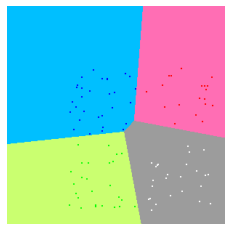


### Implementation of training procedure

With input data `x`, ground_truth `y`, and `model` as parameters, implement the gradient descent method to train your model and plot loss and accuracy vs training iterations

In [ ]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss,
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):
        #TODO compute y_hat and calculate the loss between y_hat and y as well as
        # the accuracy of y_hat w.r.t y.
        model.__init__
        y_hat = model(x)
        loss = loss_function(y_hat, y)
        acc = accuracy_function(y_hat, y)

        #TODO Then You will need to calculate gradient for all parameters, and
        #do gradient descent for all the parameters.
        #The list of parameters can be easily obtained by calling
        #model.parameters() which is implemented above.
        model.zero_grad()
        loss.backward()
        for param in model.parameters():
          param.data -= learning_rate*param.grad

        #Then plot the loss / accuracy vs iterations.
        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)

    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()


### Train the model

Load the data, format it, instantiate your model and start training!

Mounted at /content/drive/
(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.47872017819479334 accuracy: 0.98
iteration 39 loss: 0.348861093742191 accuracy: 0.99
iteration 59 loss: 0.2883111023950412 accuracy: 0.99
iteration 79 loss: 0.25101715376375294 accuracy: 1.0
iteration 99 loss: 0.2249638457993143 accuracy: 1.0
iteration 119 loss: 0.20538220466120138 accuracy: 1.0
iteration 139 loss: 0.18993958095254054 accuracy: 1.0
iteration 159 loss: 0.1773383971822004 accuracy: 1.0
iteration 179 loss: 0.16679036996060553 accuracy: 1.0
iteration 199 loss: 0.15778470176487663 accuracy: 1.0
iteration 219 loss: 0.1499736201616812 accuracy: 1.0
iteration 239 loss: 0.14311087543201312 accuracy: 1.0
iteration 259 loss: 0.13701644828967047 accuracy: 1.0
iteration 279 loss: 0.13155520099054957 accuracy: 1.0
iteration 299 loss: 0.1266233909221307 accuracy: 1.0
iteration 319 loss: 0.12213983597735802 accuracy: 1.0
iteration 339 loss: 0.11803994556378308 accuracy: 1.0
iteration 359 loss: 0.1142715788398555

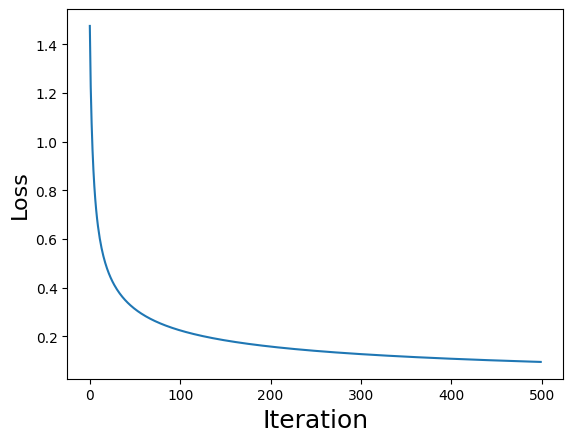

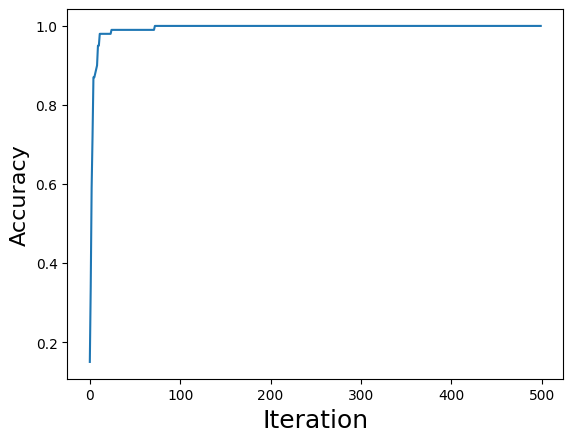

In [ ]:
## Load Q3 Dataset
from google.colab import drive
drive.mount('/content/drive/')

# datapath = './Q3_data.npz'
datapath = '/content/drive/My Drive/Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data using your Value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model using Your Data
train(x, y, linear_model)

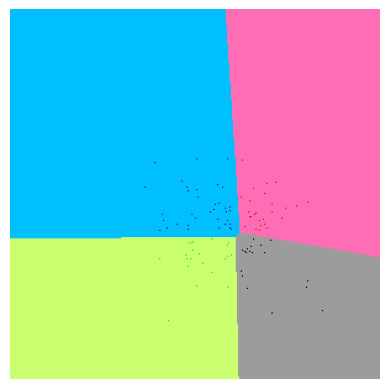

In [ ]:
## Visualize learned decision boundaries
visualization(X, Y, linear_model)

## Question 4

### a) Is this dataset linear separable?
load the dataset for this question and train a linear model on this dataset and report the performance

In [ ]:
## Load Q4 Dataset
datapath = '/content/drive/My Drive/Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data using your value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.3730020770842425 accuracy: 0.8
iteration 39 loss: 0.35273453212656647 accuracy: 0.825
iteration 59 loss: 0.34526842801932756 accuracy: 0.825
iteration 79 loss: 0.3413963575985517 accuracy: 0.85
iteration 99 loss: 0.3390891255240691 accuracy: 0.85
iteration 119 loss: 0.3376125587013257 accuracy: 0.85
iteration 139 loss: 0.33662608948070927 accuracy: 0.85
iteration 159 loss: 0.3359476134054288 accuracy: 0.85
iteration 179 loss: 0.3354709343538425 accuracy: 0.85
iteration 199 loss: 0.33513049303765824 accuracy: 0.85
iteration 219 loss: 0.334884151592464 accuracy: 0.85
iteration 239 loss: 0.33470399045491067 accuracy: 0.85
iteration 259 loss: 0.3345710623896266 accuracy: 0.85
iteration 279 loss: 0.33447225661802193 accuracy: 0.85
iteration 299 loss: 0.33439835366444126 accuracy: 0.85
iteration 319 loss: 0.33434278211993335 accuracy: 0.85
iteration 339 loss: 0.33430080398763057 accuracy: 0.85
iteration 359 loss: 0.3342689694749923 accuracy: 0.85
iteration 379 loss: 0.33

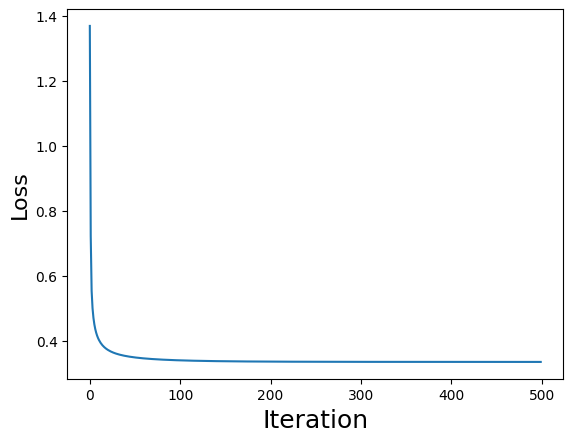

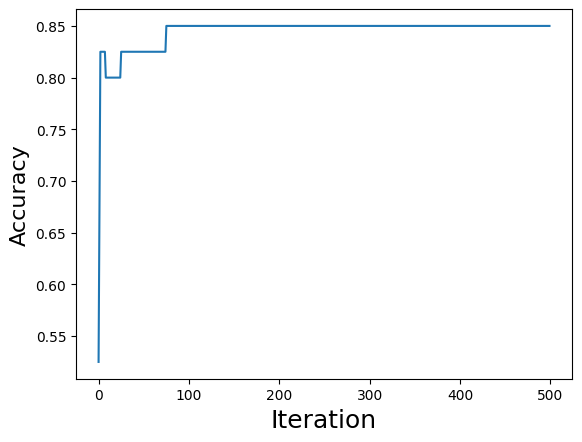

In [ ]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

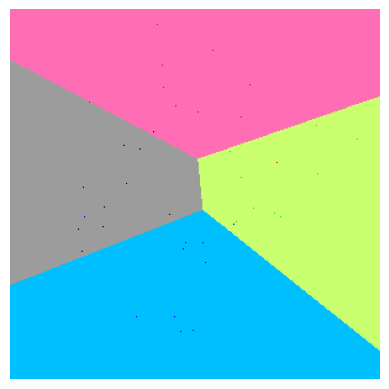

In [ ]:
## Visualize Learned Decision Boundary
visualization(X, Y, linear_model)

### b) Implementation of Multi Layer Perceptron (MLP)

Implement a class `MLP` to add arbitrary layers. You will need to implement the forward function to return results `out` with `x` fed into the model.

In [ ]:
class MLP(Module):

    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]

        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO Implement this function and return the output of a MLP
        xout = x # to get rid of error from if-else assignment
        for i in range(len(self.linear_layers)):
          layer = self.linear_layers[i]
          xout = layer(xout)
          if i == 0: # if first layer
            for j in range(len(xout[i])): # loop through each batch
              xout[i][j] = xout[i][j].relu() # relu each cell

        xout = softmax(xout)
        return xout

    def parameters(self):
        """
        Get the parameters of each layer

        Args:
            None

        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]

    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

Train your MLP model and visualize the decision boundary with ground truth points.

iteration 19 loss: 1.493668380628678 accuracy: 0.25
iteration 39 loss: 1.493668380628678 accuracy: 0.25
iteration 59 loss: 1.493668380628678 accuracy: 0.25
iteration 79 loss: 1.493668380628678 accuracy: 0.25
iteration 99 loss: 1.493668380628678 accuracy: 0.25
iteration 119 loss: 1.493668380628678 accuracy: 0.25
iteration 139 loss: 1.493668380628678 accuracy: 0.25
iteration 159 loss: 1.493668380628678 accuracy: 0.25
iteration 179 loss: 1.493668380628678 accuracy: 0.25
iteration 199 loss: 1.493668380628678 accuracy: 0.25
iteration 219 loss: 1.493668380628678 accuracy: 0.25
iteration 239 loss: 1.493668380628678 accuracy: 0.25
iteration 259 loss: 1.493668380628678 accuracy: 0.25
iteration 279 loss: 1.493668380628678 accuracy: 0.25
iteration 299 loss: 1.493668380628678 accuracy: 0.25
iteration 319 loss: 1.493668380628678 accuracy: 0.25
iteration 339 loss: 1.493668380628678 accuracy: 0.25
iteration 359 loss: 1.493668380628678 accuracy: 0.25
iteration 379 loss: 1.493668380628678 accuracy: 0.2

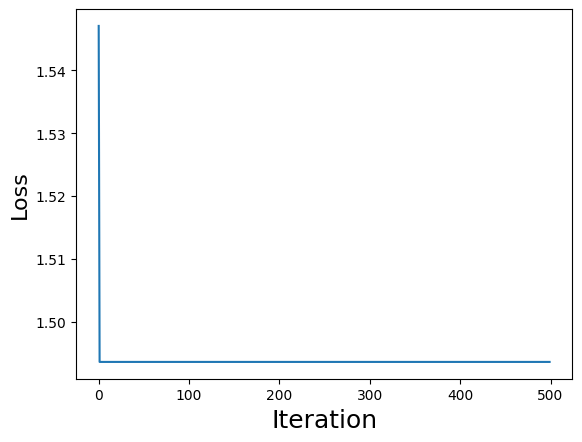

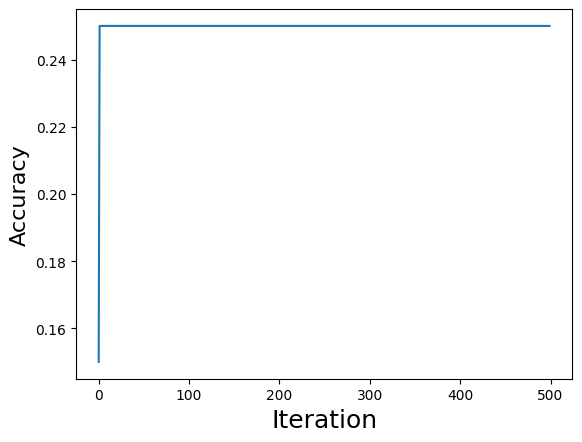

In [ ]:
## Initialize MLP with Given Parameters
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

In [ ]:
## Visualize Decision Boundaries
visualization(X, Y, mlp_model)

KeyboardInterrupt: ignored

## Acknowledgement

The design of the auto grade structure are based on the work https://github.com/karpathy/micrograd